<a href="https://colab.research.google.com/github/slealamanda/Analise-de-dados-do-Airbnb/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Projeto criado por Amanda Leal*

# Análise dos Dados do Airbnb - *Vancouver, Canadá*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**, mesmo **não possuindo nenhum hotel**!

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

A proposta do Airbnb é oferecer um tipo de hospedagem alternativa através de uma plataforma inovadora e prática que oferece imóveis de anfitriões dispostos a receber pessoas que desejam viajar (e se hospedar) de maneira prática.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, será analisado os dados referentes à cidade Vancouver, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Vancouver (good for visualisations).*


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/bc/vancouver/2020-05-11/visualisations/listings.csv")

## Análise dos Dados

Esta etapa é importante para compreender como os dados estão estrturados na aplicação.

**Dicionário das variáveis**



* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, será verificado as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10080,D1 - Million Dollar View 2 BR,30899,Rami,NaN,Downtown,49.28772,-123.12110,Entire home/apt,151,90,16,2017-02-26,0.15,49,347
1,13188,Garden level studio in ideal loc.,51466,Family Guns,NaN,Riley Park,49.24577,-123.10516,Entire home/apt,120,2,242,2020-04-30,1.94,1,211
2,13357,! Wow! 2bed 2bath 1bed den Harbour View Apartm...,52118,Liliana,NaN,Downtown Eastside,49.27955,-123.10546,Entire home/apt,161,30,58,2020-03-24,0.47,3,335
3,13358,Monthly (or Longer ) Designer One Bedroom Down...,52116,Lynn,NaN,West End,49.28209,-123.12515,Entire home/apt,70,30,427,2019-08-04,3.54,1,57
4,13490,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.25550,-123.06696,Entire home/apt,145,30,85,2020-04-18,0.78,1,326


### **Q1. Quantos atributos (variáveis) e quantas entradas o conjunto de dados possui? Quais os tipos das variáveis?**

Nesta versão resumida do Airbnb, será identificado a quantidade de entradas que o conjunto de dados possui e ver os tipos de cada coluna. 

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 5806
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

É importante verificar os tipos de cada variável para analisar se será necessário converter os dados e como estes serão visualizados.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

É importante dimencionar o impacto dos valores ausentes existentes no dataset comparado ao total de entradas. 


* É possível ver que a coluna *neighbourhood_group* possui 100% dos seus valores faltantes.
* A variável *name* tem aproximadamente 0,1% dos valores nulos.








In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.149501
last_review                       0.149501
name                              0.000172
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis, irei plotar o histograma.

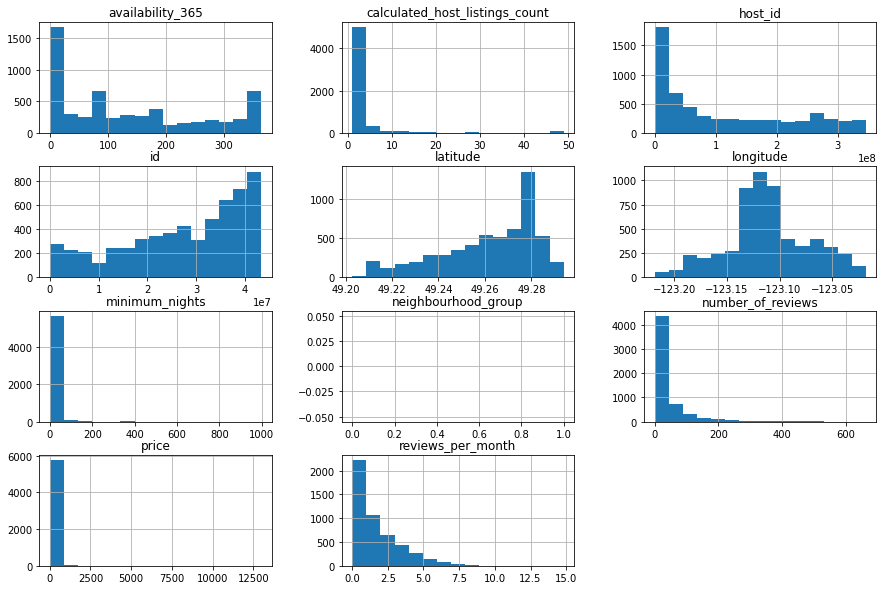

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

###**Q4. Há *outliers* presentes?**

Os *outliers* são valores que fogem da normalidade e podem causar anomalias nos resultados obtidos. Ou seja, esses valores podem enviesar todo o resultado da análise.

Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:


*   Resumo estatístico por meio do método describe()
*   Plotar boxplots para a variável.






In [ ]:
#ver o resumo estatístico das variáveis numéricas 
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5806.000000,5806.00000,5806.000000,4938.000000,5806.000000,5806.000000
mean,174.295040,14.15794,35.012745,1.724563,3.598691,137.496900
std,266.424203,34.78132,56.734073,1.667647,7.162984,126.036135
min,13.000000,1.00000,0.000000,0.010000,1.000000,0.000000
25%,85.000000,1.00000,2.000000,0.430000,1.000000,6.250000
50%,125.000000,3.00000,13.000000,1.170000,1.000000,102.000000
75%,200.000000,30.00000,44.000000,2.560000,3.000000,244.000000
max,12999.000000,998.00000,662.000000,14.820000,49.000000,365.000000


A partir desse resumo, foi possível verificar que o valor mínimo de noites ultrapassa 365 dias no ano e o valor máximo do preço ultrapassa as estimativas das porcentagens anteriores. 

###Boxplot para *minimum_nights*

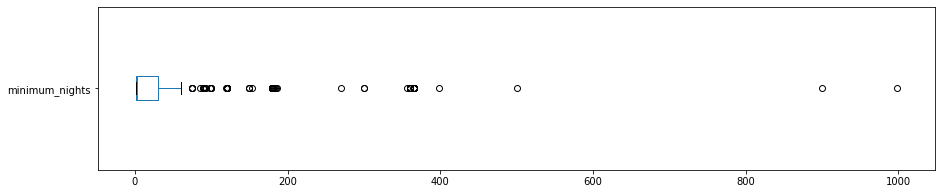

minimum_nights - valores acima de 30:
349 entradas
6.0110%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights - valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

###Boxplot para *price*

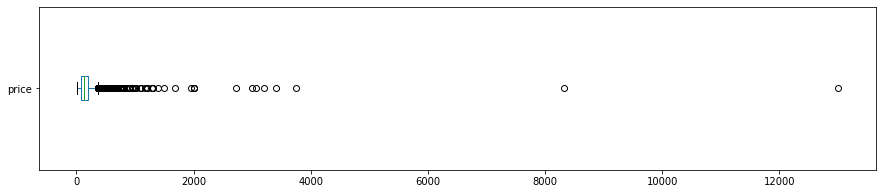


price: valores acima de 1500
13 entradas
0.2239%


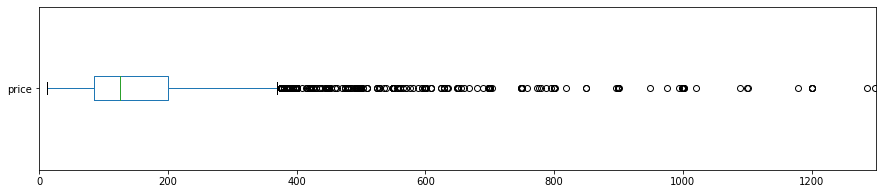

In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

df.price.plot(kind= 'box', vert=False, xlim=(0,1300), figsize=(15,3));

####Histogramas sem *outliers*

Como foi identificado anteriormente a presença de *outliers* nas variáveis **price** e **minimum_nights**, será feito uma limpa no DataFrame e depois plotar novamente o histograma. 

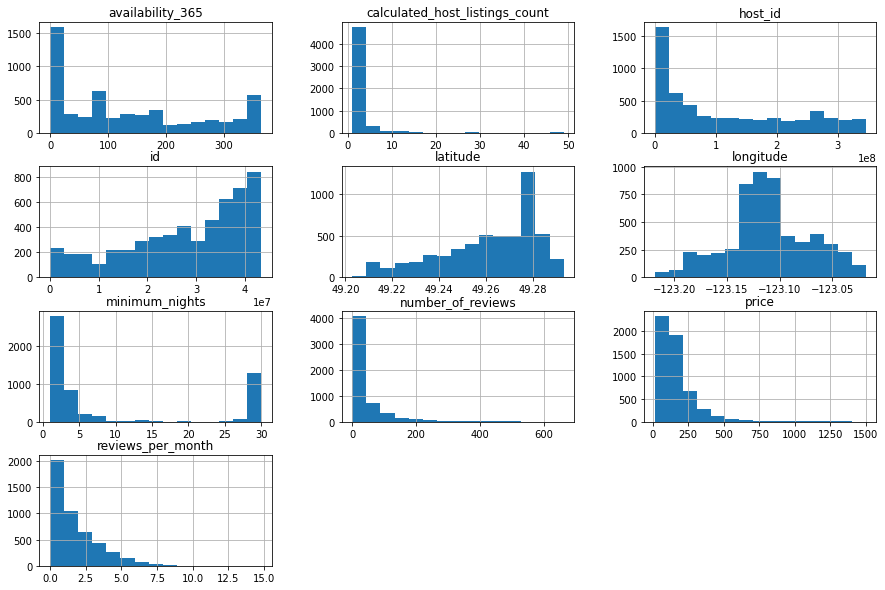

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover 'neighbourhood_group', pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

###**Q5. Qual a correlação existente entre as variáveis?**

Neste contexto, buscar uma correlação significa verificar se existe relação entre duas variáveis.

Para identificar as correlações existentes entre as variáveis de interesse será feito: 

*   Uma matriz de correlação
*   Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn





In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.104477,-0.088824,-0.042072,-0.104723,0.074260
minimum_nights,-0.104477,1.000000,-0.138773,-0.277127,0.216893,0.160650
number_of_reviews,-0.088824,-0.138773,1.000000,0.671055,-0.144496,0.055697
reviews_per_month,-0.042072,-0.277127,0.671055,1.000000,-0.162533,0.029949
calculated_host_listings_count,-0.104723,0.216893,-0.144496,-0.162533,1.000000,0.096792
availability_365,0.074260,0.160650,0.055697,0.029949,0.096792,1.000000


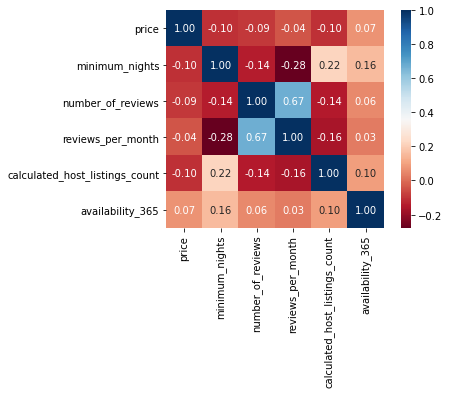

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. São dispostas as opções de casa/apt interios, quarto privado, quarto compartilhado e quarto de hotel.

Será contabilizado a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

#### Média do mínimo de noites para aluguel (minimum_nights)

In [58]:
# ver a média da coluna `minimum_nights``
print("{:.0f}".format(df_clean.minimum_nights.mean()))

9


In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    3950
Private room       1434
Shared room          49
Hotel room           13
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.725303
Private room       0.263313
Shared room        0.008997
Hotel room         0.002387
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara de Vancouver?**

Será feita uma verificação entre variáveis utilizando a função *groupby()*. 

Neste caso, será comparado a variável *neighbourhood* a partir dos preços de locação.



####Média dos preços de aluguel


In [ ]:
# ver a média da coluna `price``
print("{:.2f}".format(df_clean.price.mean()))

167.75


In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Downtown             206.055911
Kitsilano            198.358407
Dunbar Southlands    197.383648
Downtown Eastside    186.415808
West Point Grey      178.666667
Oakridge             177.548077
Arbutus Ridge        172.530000
West End             171.497041
Shaughnessy          169.469880
South Cambie         166.951220
Name: price, dtype: float64

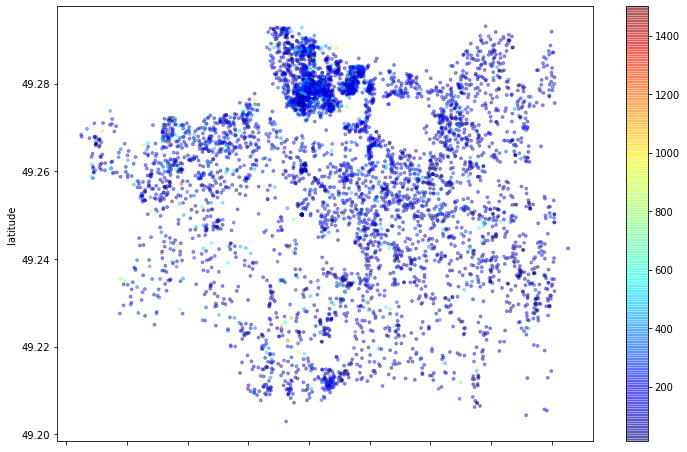

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


## Conclusões

Esta foi uma análise superficial feita a partir dos dados resumidos disponibilizados pelo Airbnb, afim de praticar o conteúdo lecionado no curso 'Data Science na Prática' do Sigmoidal. 

Foi possível perceber a presença de outliers em algumas variáveis, assim como em algumas localidades a quantidade de imóveis disponíveis pode distorcer um pouco as informações estatísticas.

Apesar da análise ter sido feita com dados resumidos, é possível ter uma noção da atuação do Airbnb na cidade de Vancouver.